In [1]:

import sys
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print('hi there is the set up........ !')
print('set up has alredy donee :)')
print('please continue !')

hi there is the set up........ !
set up has alredy donee :)
please continue !


[]

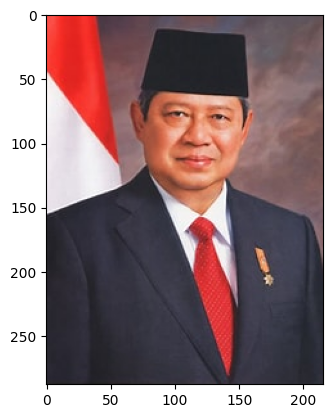

In [2]:
import matplotlib.image as mpimg

dir = 'D:\mei\indonesia-president'

ex_image = 'D:\mei\indonesia-president\sby\sby2.jpeg'
image = mpimg.imread(ex_image)
plt.imshow(image)
plt.plot()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(300, 300))
validation_generator =  test_datagen.flow_from_directory(dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (300, 300))


Found 57 images belonging to 7 classes.
Found 57 images belonging to 7 classes.


In [4]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2), 
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(), 
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'), 
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
        tf.keras.layers.Dense(7, activation='softmax')
    ]
)

In [5]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(train_generator,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/50


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3/3 [==============================] - 38s 7s/step - loss: 12.6408 - accuracy: 0.0877 - val_loss: 3.6940 - val_accuracy: 0.2281
Epoch 2/50
3/3 [==============================] - 24s 9s/step - loss: 2.7979 - accuracy: 0.2632 - val_loss: 2.1586 - val_accuracy: 0.2456
Epoch 3/50
3/3 [==============================] - 26s 8s/step - loss: 2.0737 - accuracy: 0.2281 - val_loss: 1.8939 - val_accuracy: 0.2632
Epoch 4/50
3/3 [==============================] - 75s 31s/step - loss: 1.8904 - accuracy: 0.2807 - val_loss: 1.8368 - val_accuracy: 0.3860
Epoch 5/50
3/3 [==============================] - 62s 9s/step - loss: 1.8614 - accuracy: 0.2632 - val_loss: 1.7512 - val_accuracy: 0.2807
Epoch 6/50
3/3 [==============================] - 16s 6s/step - loss: 1.8170 - accuracy: 0.2105 - val_loss: 1.6255 - val_accuracy: 0.4211
Epoch 7/50
3/3 [==============================] - 49s 20s/step - loss: 1.6416 - accuracy: 0.4211 - val_loss: 1.5156 - val_accuracy: 0.4561
Epoch 8/50
3/3 [==========================

In [7]:
presidents = {
    '0' : 'K.H. Abdurrahman Wahid',
    '1' : 'B. J. Habibie',
    '2' : 'Joko Widodo',
    '3' : 'Megawati Soekarnoputri',
    '4' : 'Susilo Bambang Yudhoyono',
    '5' : 'Soeharto',
    '6' : 'Soekarno'
}
print(presidents['6'])

Soekarno


1/1 [==============================] - 2s 2s/step
Megawati Soekarnoputri


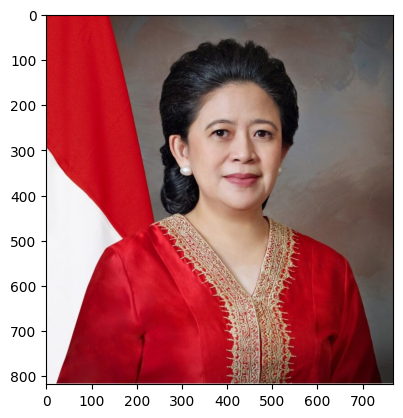

In [114]:
from PIL import Image

#prediction
test_path = 'puan2.jpg'
img = mpimg.imread(test_path)
plt.imshow(img)
plt.plot()

resize_img = Image.open(test_path)
resize_img = resize_img.resize((300, 300))
resize_img = np.asarray(resize_img)
new_img = resize_img/255
new_img = np.reshape(new_img, [1, 300, 300, 3])
result = np.argmax(model.predict(new_img))
result = presidents[str(result)] 
print(result) 